In [2]:
from datetime import datetime, date
import calendar
from time import mktime
import pandas, sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from pytz import utc, timezone

datafile = "Resources/DallasData.csv"
datafile_com = "Resources/PF_Dallas_Combined.csv"

dallas_df = pd.read_csv(datafile)
dallas_time_data_df = pd.read_csv(datafile_com)

low_memory = False

C:\Users\Annika\anaconda2\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (6,9,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Annika\anaconda2\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dallas_df['Intake Date'] = pd.to_datetime(dallas_df['Intake Date'])
dallas_df['Outcome Date'] = pd.to_datetime(dallas_df['Outcome Date'])
dallas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172204 entries, 0 to 172203
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Unnamed: 0              172204 non-null  int64         
 1   Animal Id               172204 non-null  object        
 2   Animal Type             172204 non-null  object        
 3   Animal Breed            172204 non-null  object        
 4   Kennel Number           172204 non-null  object        
 5   Kennel Status           172204 non-null  object        
 6   Council District        163774 non-null  object        
 7   Intake Type             172204 non-null  object        
 8   Intake Subtype          169098 non-null  object        
 9   Intake Total            144806 non-null  object        
 10  Reason                  97639 non-null   object        
 11  Staff Id                139216 non-null  object        
 12  Intake Date             172204

In [4]:
dallas_time_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133084 entries, 0 to 133083
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Unnamed: 0              133084 non-null  int64 
 1   Animal Id               133084 non-null  object
 2   Time on Petfinder       2955 non-null    object
 3   Animal Type             133084 non-null  object
 4   Animal Breed            133084 non-null  object
 5   Time in Shelter         129418 non-null  object
 6   Outcome Type            130129 non-null  object
 7   Time in Shelter (Days)  99666 non-null   object
dtypes: int64(1), object(7)
memory usage: 8.1+ MB


In [5]:
dallas_time_data_df['Time on Petfinder'] = pd.to_timedelta(dallas_time_data_df['Time on Petfinder'])
dallas_time_data_df['Time in Shelter'] = pd.to_timedelta(dallas_time_data_df['Time in Shelter'])

In [6]:
dallas_time_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133084 entries, 0 to 133083
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unnamed: 0              133084 non-null  int64          
 1   Animal Id               133084 non-null  object         
 2   Time on Petfinder       2955 non-null    timedelta64[ns]
 3   Animal Type             133084 non-null  object         
 4   Animal Breed            133084 non-null  object         
 5   Time in Shelter         129418 non-null  timedelta64[ns]
 6   Outcome Type            130129 non-null  object         
 7   Time in Shelter (Days)  99666 non-null   object         
dtypes: int64(1), object(5), timedelta64[ns](2)
memory usage: 8.1+ MB


<h2>Dallas Shelter data combined with the Petfinder API can show some time information for the 10 most popular dog breeds and 10 most popular cat breeds</h2>

In [7]:
dallas_time_data_df['Time in Shelter'].update(dallas_time_data_df.pop('Time on Petfinder'))

In [8]:
dallas_time_data_df

,Unnamed: 0,Animal Id,Animal Type,Animal Breed,Time in Shelter,Outcome Type,Time in Shelter (Days)
0,0,51356621,Cat,Domestic Short Hair,0 days 00:23:30,NaN,NaN
1,1,51356593,Cat,Domestic Short Hair,0 days 00:23:33,NaN,NaN
2,2,51356596,Cat,Domestic Short Hair,0 days 00:23:33,NaN,NaN
3,3,51356597,Cat,Domestic Short Hair,0 days 00:23:33,NaN,NaN
4,4,51356598,Cat,Domestic Short Hair,0 days 00:23:33,NaN,NaN
...,...,...,...,...,...,...,...
133079,133079,A1117644,Dog,Shih Tzu,NaT,OTHER,NaN
133080,133080,A1118214,Dog,Shih Tzu,NaT,OTHER,NaN
133081,133081,A1117719,Dog,Shih Tzu,NaT,OTHER,NaN
133082,133082,A1117716,Dog,Shih Tzu,0 days 00:00:00,RETURNED TO OWNER,NaN


In [9]:
dallas_time_df = dallas_time_data_df.dropna(subset=['Time in Shelter'])

In [10]:
dallas_time_df['Animal Breed'].unique()

array(['Domestic Short Hair', 'Domestic Medium Hair',
       'Domestic Long Hair', 'Siamese', 'American Shorthair',
       'Russian Blue', 'Maine Coon', 'Persian', 'Manx', 'Abyssinian',
       'Pit Bull Terrier', 'Chihuahua', 'German Shepherd Dog',
       'Labrador Retriever', 'Cairn Terrier',
       'American Staffordshire Terrier', 'Rottweiler', 'Siberian Husky',
       'Australian Cattle Dog / Blue Heeler', 'Shih Tzu'], dtype=object)

In [11]:
dallas_time_df['Animal Breed'].nunique()

20

In [12]:
dallas_time_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132373 entries, 0 to 133083
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unnamed: 0              132373 non-null  int64          
 1   Animal Id               132373 non-null  object         
 2   Animal Type             132373 non-null  object         
 3   Animal Breed            132373 non-null  object         
 4   Time in Shelter         132373 non-null  timedelta64[ns]
 5   Outcome Type            129418 non-null  object         
 6   Time in Shelter (Days)  99666 non-null   object         
dtypes: int64(1), object(5), timedelta64[ns](1)
memory usage: 8.1+ MB


In [13]:
df_mean = dallas_time_df["Time in Shelter"].mean()
df_mean

Timedelta('10 days 21:44:12.654128')

In [14]:
dallas_com_df = dallas_time_df.rename(columns={"Time in Shelter": "time_available"})

In [15]:
groupby_breed = dallas_com_df.groupby(["Animal Breed", "Animal Type"])

totalPerBreed = groupby_breed["Animal Id"].nunique()
breedTime = groupby_breed["time_available"]

totalPerBreed

Animal Breed                         Animal Type
Abyssinian                           Cat               24
American Shorthair                   Cat              494
American Staffordshire Terrier       Dog             2062
Australian Cattle Dog / Blue Heeler  Dog             1704
Cairn Terrier                        Dog             3221
Chihuahua                            Dog            16382
Domestic Long Hair                   Cat              754
Domestic Medium Hair                 Cat             2557
Domestic Short Hair                  Cat            30864
German Shepherd Dog                  Dog            13569
Labrador Retriever                   Dog            13393
Maine Coon                           Cat               96
Manx                                 Cat               29
Persian                              Cat               38
Pit Bull Terrier                     Dog            23475
Rottweiler                           Dog             1931
Russian Blue           

In [16]:
avgTimeBreed = groupby_breed["time_available"]

avg_breed_time = avgTimeBreed.apply(lambda x: np.mean(x))

avg_breed_time

Animal Breed                         Animal Type
Abyssinian                           Cat           15 days 15:33:26.500000
American Shorthair                   Cat           45 days 19:19:25.738281
American Staffordshire Terrier       Dog           28 days 23:57:01.261720
Australian Cattle Dog / Blue Heeler  Dog           15 days 15:50:58.488289
Cairn Terrier                        Dog            4 days 12:47:17.730575
Chihuahua                            Dog            6 days 13:25:09.901204
Domestic Long Hair                   Cat           13 days 10:30:41.445388
Domestic Medium Hair                 Cat           13 days 13:55:24.380125
Domestic Short Hair                  Cat           11 days 03:21:01.324797
German Shepherd Dog                  Dog            8 days 23:03:37.381419
Labrador Retriever                   Dog           13 days 07:35:48.315776
Maine Coon                           Cat           16 days 14:32:04.225490
Manx                                 Cat           

In [17]:
time_available = pd.DataFrame({"Total Animals": totalPerBreed,
                                "Average Time Available": avg_breed_time})
time_available

,,Total Animals,Average Time Available
Animal Breed,Animal Type,,
Abyssinian,Cat,24,15 days 15:33:26.500000
American Shorthair,Cat,494,45 days 19:19:25.738281
American Staffordshire Terrier,Dog,2062,28 days 23:57:01.261720
Australian Cattle Dog / Blue Heeler,Dog,1704,15 days 15:50:58.488289
Cairn Terrier,Dog,3221,4 days 12:47:17.730575
Chihuahua,Dog,16382,6 days 13:25:09.901204
Domestic Long Hair,Cat,754,13 days 10:30:41.445388
Domestic Medium Hair,Cat,2557,13 days 13:55:24.380125
Domestic Short Hair,Cat,30864,11 days 03:21:01.324797


In [18]:
outcomes_only_df = dallas_time_data_df.dropna(subset=['Outcome Type', 'Time in Shelter'])
outcomes_only_df

,Unnamed: 0,Animal Id,Animal Type,Animal Breed,Time in Shelter,Outcome Type,Time in Shelter (Days)
2955,2955,A0132276,Cat,Domestic Short Hair,2 days,RETURNED TO OWNER,<10
2956,2956,A0191737,Cat,Domestic Short Hair,37 days,LOST REPORT,30-39
2957,2957,A0262464,Cat,Domestic Short Hair,0 days,EUTHANIZED,NaN
2958,2958,A0333618,Cat,Domestic Short Hair,0 days,EUTHANIZED,NaN
2959,2959,A0440020,Cat,Domestic Short Hair,2 days,ADOPTION,<10
...,...,...,...,...,...,...,...
133072,133072,A1118150,Dog,Shih Tzu,4 days,ADOPTION,<10
133077,133077,A1116902,Dog,Shih Tzu,11 days,ADOPTION,10-19
133078,133078,A1118170,Dog,Shih Tzu,4 days,TRANSFER,<10
133082,133082,A1117716,Dog,Shih Tzu,0 days,RETURNED TO OWNER,NaN


In [19]:
outcomes_only_df['Outcome Type'].unique()

array(['RETURNED TO OWNER', 'LOST REPORT', 'EUTHANIZED', 'ADOPTION',
       'TRANSFER', 'DEAD ON ARRIVAL', 'MISSING', 'FOSTER', 'DIED',
       'FOUND REPORT', 'DISPOSAL', 'LOST EXP', 'FOUND EXP', 'TREATMENT',
       'OTHER'], dtype=object)

In [20]:
#DID NOT INCLUDE DEAD ON ARRIVAL, FOUND EXP, LOST EXP, LOST REPORT, FOUND REPORT, OR DISPOSAL

groupby_animalbreed = outcomes_only_df.groupby(['Animal Breed', 'Animal Type'])
total_with_outcomes = groupby_animalbreed["Animal Id"].nunique()


adopt_df = outcomes_only_df.loc[outcomes_only_df["Outcome Type"] == "ADOPTION",:]
groupby_adopt_breed = adopt_df.groupby(["Animal Breed", "Animal Type"])
avg_time_adopt = groupby_adopt_breed["Time in Shelter"].apply(lambda x: np.mean(x))
total_adopted = groupby_adopt_breed["Animal Id"].nunique()
percent_adopted = total_adopted / total_with_outcomes * 100

return_df = outcomes_only_df.loc[outcomes_only_df["Outcome Type"] == "RETURNED TO OWNER",:]
groupby_return_breed = return_df.groupby(["Animal Breed", "Animal Type"])
avg_time_return = groupby_return_breed["Time in Shelter"].apply(lambda x: np.mean(x))
total_returned = groupby_return_breed["Animal Id"].nunique()
percent_returned = total_returned / total_with_outcomes * 100

died_df = outcomes_only_df.loc[outcomes_only_df["Outcome Type"] == "DIED",:]
groupby_died_breed = died_df.groupby(["Animal Breed", "Animal Type"])
avg_time_died = groupby_died_breed["Time in Shelter"].apply(lambda x: np.mean(x))
total_died = groupby_died_breed["Animal Id"].nunique()
percent_died = total_died / total_with_outcomes * 100

euth_df = outcomes_only_df.loc[outcomes_only_df["Outcome Type"] == "EUTHANIZED",:]
groupby_euth_breed = euth_df.groupby(["Animal Breed", "Animal Type"])
avg_time_euth = groupby_euth_breed["Time in Shelter"].apply(lambda x: np.mean(x))
total_euth = groupby_euth_breed["Animal Id"].nunique()
percent_euth = total_euth / total_with_outcomes * 100

transfer_df = outcomes_only_df.loc[outcomes_only_df["Outcome Type"] == "TRANSFER",:]
groupby_transfer_breed = transfer_df.groupby(["Animal Breed", "Animal Type"])
avg_time_transfer = groupby_transfer_breed["Time in Shelter"].apply(lambda x: np.mean(x))
total_transfer = groupby_transfer_breed["Animal Id"].nunique()
percent_transfer = total_transfer / total_with_outcomes * 100

missing_df = outcomes_only_df.loc[outcomes_only_df["Outcome Type"] == "MISSING",:]
groupby_missing_breed = missing_df.groupby(["Animal Breed", "Animal Type"])
avg_time_missing = groupby_missing_breed["Time in Shelter"].apply(lambda x: np.mean(x))
total_missing = groupby_missing_breed["Animal Id"].nunique()
percent_missing = total_missing / total_with_outcomes * 100

foster_df = outcomes_only_df.loc[outcomes_only_df["Outcome Type"] == "FOSTER",:]
groupby_foster_breed = foster_df.groupby(["Animal Breed", "Animal Type"])
avg_time_foster = groupby_foster_breed["Time in Shelter"].apply(lambda x: np.mean(x))
total_foster = groupby_foster_breed["Animal Id"].nunique()
percent_foster = total_foster / total_with_outcomes * 100

treat_df = outcomes_only_df.loc[outcomes_only_df["Outcome Type"] == "TREATMENT",:]
groupby_treat_breed = treat_df.groupby(["Animal Breed", "Animal Type"])
avg_time_treat = groupby_treat_breed["Time in Shelter"].apply(lambda x: np.mean(x))
total_treat = groupby_treat_breed["Animal Id"].nunique()
percent_treat = total_treat / total_with_outcomes * 100

time_to_outcome = pd.DataFrame({"Number Adopted": total_adopted,
                               "Percent of Breed Adopted": percent_adopted,
                               "Average Time to Adoption Outcome": avg_time_adopt,
                               "Number Euthanized": total_euth,
                               "Percent of Breed Euthanized": percent_euth,
                               "Average Time to Euthanization Outcome": avg_time_euth,
                               "Number Returned to Owner": total_returned,
                               "Percent of Breed Returned to Owner": percent_returned,
                               "Average Time to Return to Owner Outcome": avg_time_return,
                               "Number Died at Shelter": total_died,
                               "Percent of Breed Died at Shelter": percent_died,
                               "Average Time to Died at Shelter Outcome": avg_time_died,
                                "Number Fostered": total_foster,
                               "Percent of Breed Fostered": percent_foster,
                               "Average Time to Foster Outcome": avg_time_foster,
                               "Number Treated": total_treat,
                               "Percent of Breed Treated": percent_treat,
                               "Average Time to Treatment Outcome": avg_time_treat,
                               "Number Transferred": total_transfer,
                               "Percent of Breed Transferred": percent_transfer,
                               "Average Time to Transfer Outcome": avg_time_transfer,
                               "Number Missing": total_missing,
                               "Percent of Breed Missing": percent_missing,
                               "Average Time to Missing Outcome": avg_time_missing})

time_to_outcome["Percent of Breed Adopted"] = time_to_outcome["Percent of Breed Adopted"].map("{:.2f}%".format)
time_to_outcome["Percent of Breed Returned to Owner"] = time_to_outcome["Percent of Breed Returned to Owner"].map("{:.2f}%".format)
time_to_outcome["Percent of Breed Died at Shelter"] = time_to_outcome["Percent of Breed Died at Shelter"].map("{:.2f}%".format)
time_to_outcome["Percent of Breed Euthanized"] = time_to_outcome["Percent of Breed Euthanized"].map("{:.2f}%".format)
time_to_outcome["Percent of Breed Transferred"] = time_to_outcome["Percent of Breed Transferred"].map("{:.2f}%".format)
time_to_outcome["Percent of Breed Missing"] = time_to_outcome["Percent of Breed Missing"].map("{:.2f}%".format)
time_to_outcome["Percent of Breed Fostered"] = time_to_outcome["Percent of Breed Fostered"].map("{:.2f}%".format)
time_to_outcome["Percent of Breed Treated"] = time_to_outcome["Percent of Breed Treated"].map("{:.2f}%".format)

In [21]:
time_to_outcome

,,Number Adopted,Percent of Breed Adopted,Average Time to Adoption Outcome,Number Euthanized,Percent of Breed Euthanized,Average Time to Euthanization Outcome,Number Returned to Owner,Percent of Breed Returned to Owner,Average Time to Return to Owner Outcome,Number Died at Shelter,...,Average Time to Foster Outcome,Number Treated,Percent of Breed Treated,Average Time to Treatment Outcome,Number Transferred,Percent of Breed Transferred,Average Time to Transfer Outcome,Number Missing,Percent of Breed Missing,Average Time to Missing Outcome
Animal Breed,Animal Type,,,,,,,,,,,,,,,,,,,,,
Abyssinian,Cat,6,26.09%,12 days 12:00:00,7,30.43%,2 days 20:34:17.142857,NaN,nan%,NaT,NaN,...,NaT,NaN,nan%,NaT,7,30.43%,2 days 17:08:34.285714,NaN,nan%,NaT
American Shorthair,Cat,70,15.09%,10 days 00:56:50.526315,117,25.22%,2 days 10:15:23.076923,4.0,0.86%,2 days 12:00:00,5.0,...,10 days 17:08:34.285714,NaN,nan%,NaT,116,25.00%,6 days 03:27:27.457627,2.0,0.43%,11 days 00:00:00
American Staffordshire Terrier,Dog,681,35.01%,13 days 17:10:48.609431,867,44.58%,8 days 06:13:42.145328,286.0,14.70%,3 days 11:40:18.237082,2.0,...,7 days 06:00:00,16.0,0.82%,12:00:00,190,9.77%,11 days 04:07:30,NaN,nan%,NaT
Australian Cattle Dog / Blue Heeler,Dog,631,39.29%,9 days 18:06:40.570613,252,15.69%,8 days 14:51:25.714285,319.0,19.86%,1 days 23:08:00,10.0,...,13 days 11:36:46.451612,22.0,1.37%,10:48:00,391,24.35%,10 days 08:21:59.083969,1.0,0.06%,46 days 00:00:00
Cairn Terrier,Dog,1119,34.77%,5 days 06:15:45.334434,171,5.31%,1 days 18:56:50.526315,917.0,28.50%,0 days 23:14:15.822906,18.0,...,3 days 19:45:52.941176,8.0,0.25%,07:34:44.210526,957,29.74%,5 days 06:12:00,3.0,0.09%,13 days 08:00:00
Chihuahua,Dog,5437,33.63%,6 days 04:30:45.045045,1498,9.27%,3 days 09:59:50.387182,5103.0,31.57%,0 days 22:13:48.228652,83.0,...,4 days 12:15:19.148936,123.0,0.76%,14:04:21.818181,3568,22.07%,6 days 05:20:50.992451,13.0,0.08%,9 days 22:09:13.846153
Domestic Long Hair,Cat,227,31.66%,7 days 06:07:24.444444,162,22.59%,3 days 23:42:13.333333,27.0,3.77%,5 days 06:13:20,11.0,...,7 days 14:46:09.230769,2.0,0.28%,00:00:00,215,29.99%,5 days 20:33:20,1.0,0.14%,11 days 00:00:00
Domestic Medium Hair,Cat,833,33.72%,7 days 17:55:58.389261,555,22.47%,3 days 06:18:48.648648,43.0,1.74%,4 days 11:27:16.363636,50.0,...,5 days 22:35:17.647058,21.0,0.85%,00:00:00,868,35.14%,5 days 00:27:32.193475,3.0,0.12%,28 days 00:00:00
Domestic Short Hair,Cat,9349,31.31%,7 days 16:55:42.548941,8037,26.92%,3 days 14:18:03.090705,463.0,1.55%,4 days 09:15:01.927194,664.0,...,5 days 02:41:04.361326,234.0,0.78%,02:57:42.127659,10470,35.07%,5 days 09:38:14.784324,47.0,0.16%,11 days 17:21:42.127659


In [22]:
time_to_outcome.reset_index(inplace=True)
time_to_outcome = time_to_outcome.rename(columns = {'index': 'Animal Breed'})
time_to_outcome

,Animal Breed,Animal Type,Number Adopted,Percent of Breed Adopted,Average Time to Adoption Outcome,Number Euthanized,Percent of Breed Euthanized,Average Time to Euthanization Outcome,Number Returned to Owner,Percent of Breed Returned to Owner,...,Average Time to Foster Outcome,Number Treated,Percent of Breed Treated,Average Time to Treatment Outcome,Number Transferred,Percent of Breed Transferred,Average Time to Transfer Outcome,Number Missing,Percent of Breed Missing,Average Time to Missing Outcome
0,Abyssinian,Cat,6,26.09%,12 days 12:00:00,7,30.43%,2 days 20:34:17.142857,NaN,nan%,...,NaT,NaN,nan%,NaT,7,30.43%,2 days 17:08:34.285714,NaN,nan%,NaT
1,American Shorthair,Cat,70,15.09%,10 days 00:56:50.526315,117,25.22%,2 days 10:15:23.076923,4.0,0.86%,...,10 days 17:08:34.285714,NaN,nan%,NaT,116,25.00%,6 days 03:27:27.457627,2.0,0.43%,11 days 00:00:00
2,American Staffordshire Terrier,Dog,681,35.01%,13 days 17:10:48.609431,867,44.58%,8 days 06:13:42.145328,286.0,14.70%,...,7 days 06:00:00,16.0,0.82%,12:00:00,190,9.77%,11 days 04:07:30,NaN,nan%,NaT
3,Australian Cattle Dog / Blue Heeler,Dog,631,39.29%,9 days 18:06:40.570613,252,15.69%,8 days 14:51:25.714285,319.0,19.86%,...,13 days 11:36:46.451612,22.0,1.37%,10:48:00,391,24.35%,10 days 08:21:59.083969,1.0,0.06%,46 days 00:00:00
4,Cairn Terrier,Dog,1119,34.77%,5 days 06:15:45.334434,171,5.31%,1 days 18:56:50.526315,917.0,28.50%,...,3 days 19:45:52.941176,8.0,0.25%,07:34:44.210526,957,29.74%,5 days 06:12:00,3.0,0.09%,13 days 08:00:00
5,Chihuahua,Dog,5437,33.63%,6 days 04:30:45.045045,1498,9.27%,3 days 09:59:50.387182,5103.0,31.57%,...,4 days 12:15:19.148936,123.0,0.76%,14:04:21.818181,3568,22.07%,6 days 05:20:50.992451,13.0,0.08%,9 days 22:09:13.846153
6,Domestic Long Hair,Cat,227,31.66%,7 days 06:07:24.444444,162,22.59%,3 days 23:42:13.333333,27.0,3.77%,...,7 days 14:46:09.230769,2.0,0.28%,00:00:00,215,29.99%,5 days 20:33:20,1.0,0.14%,11 days 00:00:00
7,Domestic Medium Hair,Cat,833,33.72%,7 days 17:55:58.389261,555,22.47%,3 days 06:18:48.648648,43.0,1.74%,...,5 days 22:35:17.647058,21.0,0.85%,00:00:00,868,35.14%,5 days 00:27:32.193475,3.0,0.12%,28 days 00:00:00
8,Domestic Short Hair,Cat,9349,31.31%,7 days 16:55:42.548941,8037,26.92%,3 days 14:18:03.090705,463.0,1.55%,...,5 days 02:41:04.361326,234.0,0.78%,02:57:42.127659,10470,35.07%,5 days 09:38:14.784324,47.0,0.16%,11 days 17:21:42.127659
9,German Shepherd Dog,Dog,4508,33.66%,8 days 14:55:46.081504,2946,21.99%,5 days 20:32:15.641547,3226.0,24.09%,...,13 days 18:46:09.230769,167.0,1.25%,10:30:30.508474,2606,19.46%,8 days 08:08:25.455932,18.0,0.13%,5 days 09:20:00


In [23]:
time_to_outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype          
---  ------                                   --------------  -----          
 0   Animal Breed                             20 non-null     object         
 1   Animal Type                              20 non-null     object         
 2   Number Adopted                           20 non-null     int64          
 3   Percent of Breed Adopted                 20 non-null     object         
 4   Average Time to Adoption Outcome         20 non-null     timedelta64[ns]
 5   Number Euthanized                        20 non-null     int64          
 6   Percent of Breed Euthanized              20 non-null     object         
 7   Average Time to Euthanization Outcome    20 non-null     timedelta64[ns]
 8   Number Returned to Owner                 18 non-null     float64        
 9   Percent of Breed Returned to Owner

In [24]:
breeds = time_to_outcome['Animal Breed'].unique()
cat_outcomes = time_to_outcome.loc[time_to_outcome["Animal Type"] == "Cat",:]
dog_outcomes = time_to_outcome.loc[time_to_outcome["Animal Type"] == "Dog",:]

In [25]:
dog_breeds = dog_outcomes['Animal Breed']
cat_breeds = cat_outcomes['Animal Breed']

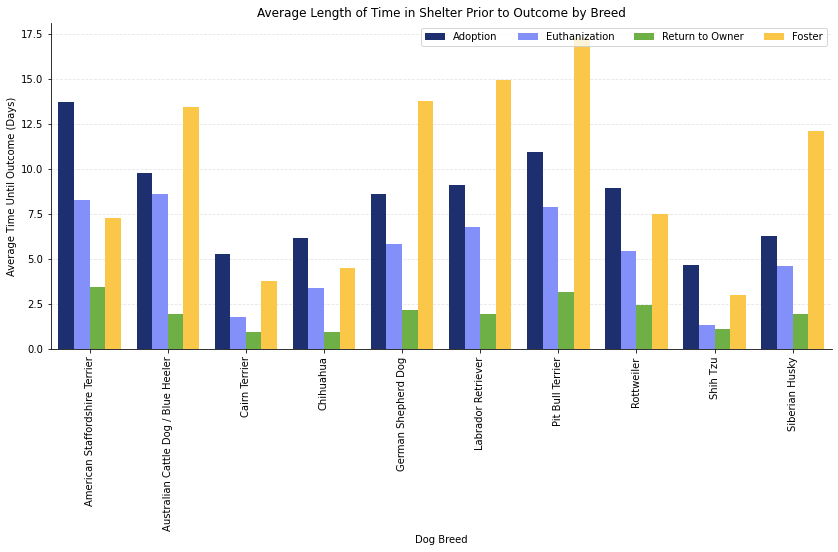

In [30]:
#BAR CHART FOR DOG OUTCOMES

# define figure
fig, ax = plt.subplots(1, figsize=(14, 6))
# numerical x
x = np.arange(0, len(dog_breeds))
# plot bars
plt.bar(x - 0.3, dog_outcomes['Average Time to Adoption Outcome'].astype('timedelta64[h]') / 24, width = 0.2, color = '#1D2F6F')
plt.bar(x -0.1, dog_outcomes['Average Time to Euthanization Outcome'].astype('timedelta64[h]') / 24, width = 0.2, color = '#8390FA')
plt.bar(x + 0.1, dog_outcomes['Average Time to Return to Owner Outcome'].astype('timedelta64[h]') / 24, width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, dog_outcomes['Average Time to Foster Outcome'].astype('timedelta64[h]') / 24, width = 0.2, color = '#FAC748')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('Average Time Until Outcome (Days)')
plt.xlabel('Dog Breed')
plt.xticks(x, dog_breeds, rotation="vertical")
plt.xlim(-0.5, 9.5)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Average Length of Time in Shelter Prior to Outcome by Breed', loc ='center')
plt.legend(['Adoption', 'Euthanization', 'Return to Owner', 'Foster'], loc='upper right', ncol = 4)
plt.show()

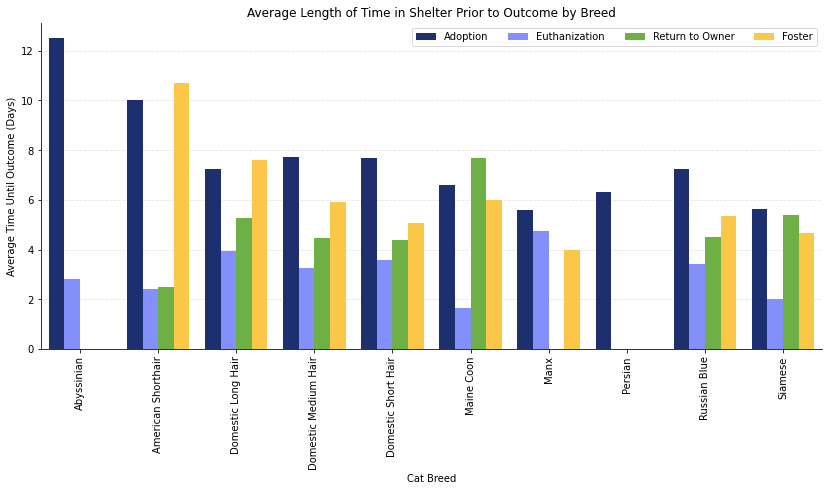

In [31]:
#BAR CHART FOR CAT OUTCOMES

# define figure
fig, ax = plt.subplots(1, figsize=(14, 6))
# numerical x
x = np.arange(0, len(cat_breeds))
# plot bars
plt.bar(x - 0.3, cat_outcomes['Average Time to Adoption Outcome'].astype('timedelta64[h]') / 24, width = 0.2, color = '#1D2F6F')
plt.bar(x -0.1, cat_outcomes['Average Time to Euthanization Outcome'].astype('timedelta64[h]') / 24, width = 0.2, color = '#8390FA')
plt.bar(x + 0.1, cat_outcomes['Average Time to Return to Owner Outcome'].astype('timedelta64[h]') / 24, width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, cat_outcomes['Average Time to Foster Outcome'].astype('timedelta64[h]') / 24, width = 0.2, color = '#FAC748')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# x y details
plt.ylabel('Average Time Until Outcome (Days)')
plt.xlabel('Cat Breed')
plt.xticks(x, cat_breeds, rotation="vertical")
plt.xlim(-0.5, 9.5)
# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
# title and legend
plt.title('Average Length of Time in Shelter Prior to Outcome by Breed', loc ='center')
plt.legend(['Adoption', 'Euthanization', 'Return to Owner', 'Foster'], loc='upper right', ncol = 4)
plt.show()

<h1>Using Dallas Shelter Data Only</h1>
<h2>Shelter data has outcome types and is separated by Fiscal Year so can provide more detailed analysis</h2>

In [19]:
time_in_shelter = dallas_df["Outcome Date"] - dallas_df["Intake Date"]
dallas_df.insert(1, "Time in Shelter", time_in_shelter, True)
dallas_df

,Unnamed: 0,Time in Shelter,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Council District,Intake Type,Intake Subtype,...,Outcome Type,Outcome Date,Impound Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Outcome Subtype
0,1,0 days,A0001656,DOG,LABRADOR RETR,LAB 01,LAB,6,OWNER SURRENDER,GENERAL,...,EUTHANIZED,2016-07-21,K16-353536,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN
1,2,54 days,A0014681,DOG,PIT BULL,PAWS 24,UNAVAILABLE,7,OWNER SURRENDER,GENERAL,...,TRANSFER,2016-03-31,K16-338470,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,TAGGHOUSEBROKEN/FREE ADOPT,FEB.2016,FY2016,NaN
2,3,0 days,A0117773,DOG,PIT BULL,LAB 01,LAB,2,OWNER SURRENDER,EUTHANASIA REQUESTED,...,EUTHANIZED,2016-07-05,K16-351923,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN
3,4,12 days,A0119934,CAT,RUSSIAN BLUE,LOST,LOST REPORT,14,LOST REPORT,NaN,...,LOST REPORT,2016-07-19,K16-345201,HEALTHY,UNABLE TO SCAN,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN
4,5,2 days,A0132276,CAT,DOMESTIC SH,QC 03,RELEASED FROM QUARANTINE,10,CONFISCATED,QUARANTINE,...,RETURNED TO OWNER,2016-09-27,K16-359916,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,SEP.2016,FY2016,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172199,11014,1 days,A1100474,DOG,CHIHUAHUA SH,LFSD 18,UNAVAILABLE,1,OWNER SURRENDER,FIELD,...,RETURNED TO OWNER,2021-04-16,K21-524674,APP WNL,SCAN CHIP,FIELD,AEG,APR.2021,FY2021,WESTMORELD
172200,11017,1 days,A0701527,DOG,SCHNAUZER STAND,LFSD 03,IMPOUNDED,7,STRAY,CONFINED,...,RETURNED TO OWNER,2021-04-16,K21-524654,APP WNL,SCAN CHIP,FIELD,ITR,APR.2021,FY2021,WESTMORELD
172201,11018,1 days,A1118116,CAT,DOMESTIC SH,N04,UNAVAILABLE,13,STRAY,OTC,...,FOSTER,2021-04-16,K21-524648,UNDERAGE,SCAN NO CHIP,OVER THE COUNTER,AEG,APR.2021,FY2021,UNDERAGE
172202,11019,35 days,A1116166,DOG,GERM SHEPHERD,LOST,IMPOUNDED,NaN,STRAY,WEB,...,LOST EXP,2021-04-16,K21-522659,NaN,NaN,NaN,NaN,MAR.2021,FY2021,OTHER


In [20]:
totalAnimals = dallas_df["Animal Id"].nunique()

bins = [pd.Timedelta("0 days"), pd.Timedelta("9 days"), pd.Timedelta("19 days"),pd.Timedelta("29 days"), pd.Timedelta("39 days"), pd.Timedelta("150 days")]
time_labels = ["<10 Days", "10-19 Days", "20-29 Days", "30-39 Days", "40+ Days"]

dallas_df["Time in Shelter (Days)"] = pd.cut(dallas_df["Time in Shelter"], bins, labels=time_labels)
groupby_time = dallas_df.groupby(["Time in Shelter (Days)"])

animalCount = groupby_time["Animal Id"].nunique()
timePercent = animalCount / totalAnimals * 100

time_demographics = pd.DataFrame({"Animals": animalCount,
                                 "Percent of Animals": timePercent})

time_demographics["Percent of Animals"] = time_demographics["Percent of Animals"].map("{:.2f}%".format)

time_demographics

,Animals,Percent of Animals
Time in Shelter (Days),,
<10 Days,82528,54.95%
10-19 Days,24121,16.06%
20-29 Days,6072,4.04%
30-39 Days,5445,3.63%
40+ Days,3051,2.03%


In [21]:
dallas_df

,Unnamed: 0,Time in Shelter,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Council District,Intake Type,Intake Subtype,...,Outcome Date,Impound Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Outcome Subtype,Time in Shelter (Days)
0,1,0 days,A0001656,DOG,LABRADOR RETR,LAB 01,LAB,6,OWNER SURRENDER,GENERAL,...,2016-07-21,K16-353536,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,NaN
1,2,54 days,A0014681,DOG,PIT BULL,PAWS 24,UNAVAILABLE,7,OWNER SURRENDER,GENERAL,...,2016-03-31,K16-338470,TREATABLE MANAGEABLE NON-CONTAGIOUS,SCAN NO CHIP,FIELD,TAGGHOUSEBROKEN/FREE ADOPT,FEB.2016,FY2016,NaN,40+ Days
2,3,0 days,A0117773,DOG,PIT BULL,LAB 01,LAB,2,OWNER SURRENDER,EUTHANASIA REQUESTED,...,2016-07-05,K16-351923,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN NO CHIP,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,NaN
3,4,12 days,A0119934,CAT,RUSSIAN BLUE,LOST,LOST REPORT,14,LOST REPORT,NaN,...,2016-07-19,K16-345201,HEALTHY,UNABLE TO SCAN,OVER THE COUNTER,NaN,JUL.2016,FY2016,NaN,10-19 Days
4,5,2 days,A0132276,CAT,DOMESTIC SH,QC 03,RELEASED FROM QUARANTINE,10,CONFISCATED,QUARANTINE,...,2016-09-27,K16-359916,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,UNABLE TO SCAN,FIELD,NaN,SEP.2016,FY2016,NaN,<10 Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172199,11014,1 days,A1100474,DOG,CHIHUAHUA SH,LFSD 18,UNAVAILABLE,1,OWNER SURRENDER,FIELD,...,2021-04-16,K21-524674,APP WNL,SCAN CHIP,FIELD,AEG,APR.2021,FY2021,WESTMORELD,<10 Days
172200,11017,1 days,A0701527,DOG,SCHNAUZER STAND,LFSD 03,IMPOUNDED,7,STRAY,CONFINED,...,2021-04-16,K21-524654,APP WNL,SCAN CHIP,FIELD,ITR,APR.2021,FY2021,WESTMORELD,<10 Days
172201,11018,1 days,A1118116,CAT,DOMESTIC SH,N04,UNAVAILABLE,13,STRAY,OTC,...,2021-04-16,K21-524648,UNDERAGE,SCAN NO CHIP,OVER THE COUNTER,AEG,APR.2021,FY2021,UNDERAGE,<10 Days
172202,11019,35 days,A1116166,DOG,GERM SHEPHERD,LOST,IMPOUNDED,NaN,STRAY,WEB,...,2021-04-16,K21-522659,NaN,NaN,NaN,NaN,MAR.2021,FY2021,OTHER,30-39 Days


In [24]:
groupby_outcome = dallas_df.groupby(["Outcome Type"])

totalPerOutcome = groupby_outcome["Animal Id"].nunique()
avgTimeOutcome = groupby_outcome["Time in Shelter"]

avg_outcome_time = avgTimeOutcome.apply(lambda x: np.mean(x))

time_until_outcome = pd.DataFrame({"Total Animals": totalPerOutcome,
                                "Average Time Before Outcome": avg_outcome_time})
time_until_outcome

,Total Animals,Average Time Before Outcome
Outcome Type,,
ADOPTION,46725,8 days 06:53:38.707015
DEAD ON ARRIVAL,1727,2 days 05:43:31.928199
DIED,1574,3 days 19:21:52.833545
DISPOSAL,166,1 days 09:49:52.771084
EUTHANIZED,34393,5 days 06:52:58.668837
FOSTER,4038,7 days 15:46:32.339261
FOUND EXP,954,43 days 05:16:58.867924
FOUND REPORT,837,20 days 04:40:25.806451
LOST EXP,3083,46 days 07:19:31.196886


In [25]:
dallas_df['Animal Breed'] = dallas_df['Animal Breed'].replace(['STAFFORDSHIRE','CHIHUAHUA SH','CHIHUAHUA LH','COLLIE SMOOTH','COLLIE ROUGH','DOMESTIC SHORTH'],
                                                          ['AMERICAN STAFF','CHIHUAHUA','CHIHUAHUA','COLLIE', 'COLLIE','DOMESTIC SH'])

In [28]:
dogs_df = dallas_df.loc[dallas_df["Animal Type"] == "DOG",:]
cats_df = dallas_df.loc[dallas_df["Animal Type"] == "CAT",:]

In [33]:
groupby_dogs_year = dogs_df.groupby(["Year"])
num_dogs_year = groupby_dogs_year["Animal Id"].nunique()
groupby_year = dallas_df.groupby(["Year"])
yearCount = groupby_year["Animal Id"].nunique()

pitbulls_df = dogs_df.loc[dogs_df["Animal Breed"] == "PIT BULL",:]
groupby_pitbulls_year = pitbulls_df.groupby(["Year"])
num_pitbulls_year = groupby_pitbulls_year["Animal Id"].nunique()

chihuahuas_df = dogs_df.loc[dogs_df["Animal Breed"] == "CHIHUAHUA",:]
groupby_chihuahuas_year = chihuahuas_df.groupby(["Year"])
num_chihuahuas_year = groupby_chihuahuas_year["Animal Id"].nunique()

germshep_df = dogs_df.loc[dogs_df["Animal Breed"] == "GERM SHEPHERD",:]
groupby_germshep_year = germshep_df.groupby(["Year"])
num_germshep_year = groupby_germshep_year["Animal Id"].nunique()

lab_df = dogs_df.loc[dogs_df["Animal Breed"] == "LABRADOR RETR",:]
groupby_lab_year = lab_df.groupby(["Year"])
num_lab_year = groupby_lab_year["Animal Id"].nunique()

cairn_df = dogs_df.loc[dogs_df["Animal Breed"] == "CAIRN TERRIER",:]
groupby_cairn_year = cairn_df.groupby(["Year"])
num_cairn_year = groupby_cairn_year["Animal Id"].nunique()

rott_df = dogs_df.loc[dogs_df["Animal Breed"] == "ROTTWEILER",:]
groupby_rott_year = rott_df.groupby(["Year"])
num_rott_year = groupby_rott_year["Animal Id"].nunique()

husky_df = dogs_df.loc[dogs_df["Animal Breed"] == "ALASKAN HUSKY",:]
groupby_husky_year = husky_df.groupby(["Year"])
num_husky_year = groupby_husky_year["Animal Id"].nunique()

shihtzu_df = dogs_df.loc[dogs_df["Animal Breed"] == "SHIH TZU",:]
groupby_shihtzu_year = shihtzu_df.groupby(["Year"])
num_shihtzu_year = groupby_shihtzu_year["Animal Id"].nunique()

cattledog_df = dogs_df.loc[dogs_df["Animal Breed"] == "AUST CATTLE DOG",:]
groupby_cattledog_year = cattledog_df.groupby(["Year"])
num_cattledog_year = groupby_cattledog_year["Animal Id"].nunique()

amstaff_df = dogs_df.loc[dogs_df["Animal Breed"] == "AMERICAN STAFF",:]
groupby_amstaff_year = amstaff_df.groupby(["Year"])
num_amstaff_year = groupby_amstaff_year["Animal Id"].nunique()


percent_total_pitbulls = num_pitbulls_year / num_dogs_year * 100
percent_total_chihuahuas = num_chihuahuas_year / num_dogs_year * 100
percent_total_germshep = num_germshep_year / num_dogs_year * 100
percent_total_lab = num_lab_year / num_dogs_year * 100
percent_total_cairn = num_cairn_year / num_dogs_year * 100
percent_total_rott = num_rott_year / num_dogs_year * 100
percent_total_husky = num_husky_year / num_dogs_year * 100
percent_total_shihtzu = num_shihtzu_year / num_dogs_year * 100
percent_total_cattledog = num_cattledog_year / num_dogs_year * 100
percent_total_amstaff = num_amstaff_year / num_dogs_year * 100


dog_breeds_per_year = pd.DataFrame({"Total Dogs Admitted": num_dogs_year,
                                "Total Pitbulls": num_pitbulls_year,
                                "Percent Pitbulls": percent_total_pitbulls,
                                "Total Chihuahuas": num_chihuahuas_year,
                                "Percent Chihuahuas": percent_total_chihuahuas,
                                "Total German Shepherds": num_germshep_year,
                                "Percent German Shepherds": percent_total_germshep,
                                "Total Labrador Retrievers": num_lab_year,
                                "Percent Labrador Retrievers": percent_total_lab,
                                "Total Cairn Terriers": num_cairn_year,
                                "Percent Cairn Terriers": percent_total_cairn,
                                "Total Rottweilers": num_rott_year,
                                "Percent Rottweilers": percent_total_rott, 
                                "Total Alaskan Huskies": num_husky_year,
                                "Percent Huskies": percent_total_husky,
                                "Total Shih Tzus": num_shihtzu_year,
                                "Percent Shih Tzus": percent_total_shihtzu,
                                "Total Cattledogs": num_cattledog_year,
                                "Percent Cattledogs": percent_total_cattledog,
                                "Total American Staffordshire": num_amstaff_year,
                                "Percent American Staffordshire": percent_total_amstaff,
                                "Total Animals Admitted": yearCount})

dog_breeds_per_year["Percent Pitbulls"] = dog_breeds_per_year["Percent Pitbulls"].map("{:.2f}%".format)
dog_breeds_per_year["Percent Chihuahuas"] = dog_breeds_per_year["Percent Chihuahuas"].map("{:.2f}%".format)
dog_breeds_per_year["Percent German Shepherds"] = dog_breeds_per_year["Percent German Shepherds"].map("{:.2f}%".format)
dog_breeds_per_year["Percent Labrador Retrievers"] = dog_breeds_per_year["Percent Labrador Retrievers"].map("{:.2f}%".format)
dog_breeds_per_year["Percent Cairn Terriers"] = dog_breeds_per_year["Percent Cairn Terriers"].map("{:.2f}%".format)
dog_breeds_per_year["Percent Rottweilers"] = dog_breeds_per_year["Percent Rottweilers"].map("{:.2f}%".format)
dog_breeds_per_year["Percent Huskies"] = dog_breeds_per_year["Percent Huskies"].map("{:.2f}%".format)
dog_breeds_per_year["Percent Shih Tzus"] = dog_breeds_per_year["Percent Shih Tzus"].map("{:.2f}%".format)
dog_breeds_per_year["Percent Cattledogs"] = dog_breeds_per_year["Percent Cattledogs"].map("{:.2f}%".format)
dog_breeds_per_year["Percent American Staffordshire"] = dog_breeds_per_year["Percent American Staffordshire"].map("{:.2f}%".format)

dog_breeds_per_year

,Total Dogs Admitted,Total Pitbulls,Percent Pitbulls,Total Chihuahuas,Percent Chihuahuas,Total German Shepherds,Percent German Shepherds,Total Labrador Retrievers,Percent Labrador Retrievers,Total Cairn Terriers,...,Percent Rottweilers,Total Alaskan Huskies,Percent Huskies,Total Shih Tzus,Percent Shih Tzus,Total Cattledogs,Percent Cattledogs,Total American Staffordshire,Percent American Staffordshire,Total Animals Admitted
Year,,,,,,,,,,,,,,,,,,,,,
FY2016,20205,3429,16.97%,2748,13.60%,2524,12.49%,2890,14.30%,600,...,1.85%,223,1.10%,277,1.37%,338,1.67%,1119,5.54%,28897
FY2017,23159,5229,22.58%,3631,15.68%,2870,12.39%,2811,12.14%,682,...,1.81%,292,1.26%,346,1.49%,262,1.13%,318,1.37%,31298
FY2018,22777,5236,22.99%,3559,15.63%,2855,12.53%,2715,11.92%,795,...,1.87%,379,1.66%,372,1.63%,342,1.50%,236,1.04%,31541
FY2019,25799,5608,21.74%,4328,16.78%,3154,12.23%,2851,11.05%,824,...,1.47%,465,1.80%,478,1.85%,393,1.52%,205,0.79%,35545
FY2020,16440,3618,22.01%,2233,13.58%,2152,13.09%,1778,10.82%,402,...,1.89%,383,2.33%,303,1.84%,248,1.51%,165,1.00%,22477
FY2021,6330,1622,25.62%,577,9.12%,813,12.84%,779,12.31%,80,...,1.80%,176,2.78%,81,1.28%,121,1.91%,50,0.79%,8461


In [38]:
groupby_totaloutcome = dallas_df.groupby(["Outcome Type"])
totalOutcomeCount = groupby_totaloutcome["Animal Id"].nunique()
groupby_outcome = dogs_df.groupby(["Outcome Type"])
outcomeCount = groupby_outcome["Animal Id"].nunique()

groupby_pitbulls_outcome = pitbulls_df.groupby(["Outcome Type"])
num_pitbulls_outcome = groupby_pitbulls_outcome["Animal Id"].nunique()
num_pitbulls = pitbulls_df["Animal Id"].nunique()

groupby_chihuahuas_outcome = chihuahuas_df.groupby(["Outcome Type"])
num_chihuahuas_outcome = groupby_chihuahuas_outcome["Animal Id"].nunique()
num_chihuahuas = chihuahuas_df["Animal Id"].nunique()

groupby_germshep_outcome = germshep_df.groupby(["Outcome Type"])
num_germshep_outcome = groupby_germshep_outcome["Animal Id"].nunique()
num_germshep = germshep_df["Animal Id"].nunique()

groupby_lab_outcome = lab_df.groupby(["Outcome Type"])
num_lab_outcome = groupby_lab_outcome["Animal Id"].nunique()
num_lab = lab_df["Animal Id"].nunique()

groupby_cairn_outcome = cairn_df.groupby(["Outcome Type"])
num_cairn_outcome = groupby_cairn_outcome["Animal Id"].nunique()
num_cairn = cairn_df["Animal Id"].nunique()

groupby_rott_outcome = rott_df.groupby(["Outcome Type"])
num_rott_outcome = groupby_rott_outcome["Animal Id"].nunique()
num_rott = rott_df["Animal Id"].nunique()

groupby_husky_outcome = husky_df.groupby(["Outcome Type"])
num_husky_outcome = groupby_husky_outcome["Animal Id"].nunique()
num_husky = husky_df["Animal Id"].nunique()

groupby_shihtzu_outcome = shihtzu_df.groupby(["Outcome Type"])
num_shihtzu_outcome = groupby_shihtzu_outcome["Animal Id"].nunique()
num_shihtzu = shihtzu_df["Animal Id"].nunique()

groupby_cattledog_outcome = cattledog_df.groupby(["Outcome Type"])
num_cattledog_outcome = groupby_cattledog_outcome["Animal Id"].nunique()
num_cattledog = cattledog_df["Animal Id"].nunique()


groupby_amstaff_outcome = amstaff_df.groupby(["Outcome Type"])
num_amstaff_outcome = groupby_amstaff_outcome["Animal Id"].nunique()
num_amstaff = amstaff_df["Animal Id"].nunique()

percent_total_pitbullsoutcome = num_pitbulls_outcome / num_pitbulls * 100
percent_total_chihuahuasoutcome = num_chihuahuas_outcome / num_chihuahuas * 100
percent_total_germshepoutcome = num_germshep_outcome / num_germshep * 100
percent_total_laboutcome = num_lab_outcome / num_lab * 100
percent_total_cairnoutcome = num_cairn_outcome / num_cairn * 100
percent_total_rottoutcome = num_rott_outcome / num_rott * 100
percent_total_huskyoutcome = num_husky_outcome / num_husky * 100
percent_total_shihtzuoutcome = num_shihtzu_outcome / num_shihtzu * 100
percent_total_cattledogoutcome = num_cattledog_outcome / num_cattledog * 100
percent_total_amstaffoutcome = num_amstaff_outcome / num_amstaff * 100


dog_breeds_per_outcome = pd.DataFrame({"Total Dogs with Outcomes": outcomeCount,
                                "Total Pitbulls": num_pitbulls_outcome,
                                "Percent Pitbulls": percent_total_pitbullsoutcome,
                                "Total Chihuahuas": num_chihuahuas_outcome,
                                "Percent Chihuahuas": percent_total_chihuahuasoutcome,
                                "Total German Shepherds": num_germshep_outcome,
                                "Percent German Shepherds": percent_total_germshepoutcome,
                                "Total Labrador Retrievers": num_lab_outcome,
                                "Percent Labrador Retrievers": percent_total_laboutcome,
                                "Total Cairn Terriers": num_cairn_outcome,
                                "Percent Cairn Terriers": percent_total_cairnoutcome,
                                "Total Rottweilers": num_rott_outcome,
                                "Percent Rottweilers": percent_total_rottoutcome, 
                                "Total American Staffordshire": num_amstaff_outcome,
                                "Percent American Staffordshire": percent_total_amstaffoutcome,
                                "Total Alaskan Huskies": num_husky_outcome,
                                "Percent Huskies": percent_total_huskyoutcome,
                                "Total Shih Tzus": num_shihtzu_outcome,
                                "Percent Shih Tzus": percent_total_shihtzuoutcome,
                                "Total Cattledogs": num_cattledog_outcome,
                                "Percent Cattledogs": percent_total_cattledogoutcome,
                                "Total Animals with Outcomes": totalOutcomeCount})

dog_breeds_per_outcome["Percent Pitbulls"] = dog_breeds_per_outcome["Percent Pitbulls"].map("{:.2f}%".format)
dog_breeds_per_outcome["Percent Chihuahuas"] = dog_breeds_per_outcome["Percent Chihuahuas"].map("{:.2f}%".format)
dog_breeds_per_outcome["Percent German Shepherds"] = dog_breeds_per_outcome["Percent German Shepherds"].map("{:.2f}%".format)
dog_breeds_per_outcome["Percent Labrador Retrievers"] = dog_breeds_per_outcome["Percent Labrador Retrievers"].map("{:.2f}%".format)
dog_breeds_per_outcome["Percent Cairn Terriers"] = dog_breeds_per_outcome["Percent Cairn Terriers"].map("{:.2f}%".format)
dog_breeds_per_outcome["Percent Rottweilers"] = dog_breeds_per_outcome["Percent Rottweilers"].map("{:.2f}%".format)
dog_breeds_per_outcome["Percent Huskies"] = dog_breeds_per_outcome["Percent Huskies"].map("{:.2f}%".format)
dog_breeds_per_outcome["Percent Shih Tzus"] = dog_breeds_per_outcome["Percent Shih Tzus"].map("{:.2f}%".format)
dog_breeds_per_outcome["Percent Cattledogs"] = dog_breeds_per_outcome["Percent Cattledogs"].map("{:.2f}%".format)
dog_breeds_per_outcome["Percent American Staffordshire"] = dog_breeds_per_outcome["Percent American Staffordshire"].map("{:.2f}%".format)

avgTimeBreed = groupby_breed["time_available"]


avg_breed_time = avgTimeBreed.apply(lambda x: np.mean(x))dog_breeds_per_outcome

,Total Dogs with Outcomes,Total Pitbulls,Percent Pitbulls,Total Chihuahuas,Percent Chihuahuas,Total German Shepherds,Percent German Shepherds,Total Labrador Retrievers,Percent Labrador Retrievers,Total Cairn Terriers,...,Percent Rottweilers,Total Alaskan Huskies,Percent Huskies,Total Shih Tzus,Percent Shih Tzus,Total Cattledogs,Percent Cattledogs,Total American Staffordshire,Percent American Staffordshire,Total Animals with Outcomes
ADOPTION,35041.0,6809.0,29.43%,5442.0,33.52%,4510.0,33.51%,5144.0,39.66%,1119.0,...,28.00%,695.0,39.69%,448.0,25.67%,631.0,39.17%,681.0,34.85%,46725
DEAD ON ARRIVAL,1083.0,242.0,1.05%,153.0,0.94%,140.0,1.04%,89.0,0.69%,28.0,...,1.47%,12.0,0.69%,21.0,1.20%,24.0,1.49%,13.0,0.67%,1727
DIED,579.0,162.0,0.70%,83.0,0.51%,94.0,0.70%,63.0,0.49%,18.0,...,0.68%,4.0,0.23%,6.0,0.34%,10.0,0.62%,2.0,0.10%,1574
DISPOSAL,95.0,34.0,0.15%,13.0,0.08%,10.0,0.07%,11.0,0.08%,1.0,...,0.11%,3.0,0.17%,1.0,0.06%,NaN,nan%,NaN,nan%,166
EUTHANIZED,22264.0,8589.0,37.12%,1498.0,9.23%,2946.0,21.89%,2983.0,23.00%,171.0,...,26.79%,171.0,9.77%,103.0,5.90%,252.0,15.64%,867.0,44.37%,34393
FOSTER,1138.0,409.0,1.77%,91.0,0.56%,145.0,1.08%,180.0,1.39%,17.0,...,1.16%,10.0,0.57%,1.0,0.06%,27.0,1.68%,12.0,0.61%,4038
FOUND EXP,841.0,94.0,0.41%,110.0,0.68%,98.0,0.73%,63.0,0.49%,10.0,...,0.68%,23.0,1.31%,24.0,1.38%,8.0,0.50%,8.0,0.41%,954
FOUND REPORT,768.0,70.0,0.30%,128.0,0.79%,71.0,0.53%,78.0,0.60%,35.0,...,0.37%,21.0,1.20%,24.0,1.38%,9.0,0.56%,11.0,0.56%,837
LOST EXP,2383.0,231.0,1.00%,318.0,1.96%,201.0,1.49%,147.0,1.13%,18.0,...,1.84%,57.0,3.26%,88.0,5.04%,22.0,1.37%,19.0,0.97%,3083
LOST REPORT,1856.0,233.0,1.01%,257.0,1.58%,164.0,1.22%,150.0,1.16%,44.0,...,1.95%,40.0,2.28%,79.0,4.53%,15.0,0.93%,26.0,1.33%,2209


In [ ]:
groupby_breed = dallas_df.groupby(["Animal Breed"])

groupby_adoption_outcome = pitbulls_df.groupby(["Outcome Type"])
num_pitbulls_outcome = groupby_pitbulls_outcome["Animal Id"].nunique()
num_pitbulls = pitbulls_df["Animal Id"].nunique()


In [61]:
grouped_outcomes = dogs_df.groupby(["Outcome Type"]).sum()

groupby_pitbulls_outcome_time = pitbulls_df.groupby(["Outcome Type"])
avg_pitbulls_outcome_time = groupby_pitbulls_outcome_time["Time in Shelter"].apply(lambda x: np.mean(x))

groupby_chihuahuas_outcome_time = chihuahuas_df.groupby(["Outcome Type"])
avg_chihuahuas_outcome_time = groupby_chihuahuas_outcome_time["Time in Shelter"].apply(lambda x: np.mean(x))

groupby_germshep_outcome_time = germshep_df.groupby(["Outcome Type"])
avg_germshep_outcome_time = groupby_germshep_outcome_time["Time in Shelter"].apply(lambda x: np.mean(x))

groupby_lab_outcome_time = lab_df.groupby(["Outcome Type"])
avg_lab_outcome_time = groupby_lab_outcome_time["Time in Shelter"].apply(lambda x: np.mean(x))

groupby_cairn_outcome_time = cairn_df.groupby(["Outcome Type"])
avg_cairn_outcome_time = groupby_cairn_outcome_time["Time in Shelter"].apply(lambda x: np.mean(x))

groupby_rott_outcome_time = rott_df.groupby(["Outcome Type"])
avg_rott_outcome_time = groupby_rott_outcome_time["Time in Shelter"].apply(lambda x: np.mean(x))

groupby_husky_outcome_time = husky_df.groupby(["Outcome Type"])
avg_husky_outcome_time = groupby_husky_outcome_time["Time in Shelter"].apply(lambda x: np.mean(x))

groupby_shihtzu_outcome_time = shihtzu_df.groupby(["Outcome Type"])
avg_shihtzu_outcome_time = groupby_shihtzu_outcome_time["Time in Shelter"].apply(lambda x: np.mean(x))

groupby_cattledog_outcome_time = cattledog_df.groupby(["Outcome Type"])
avg_cattledog_outcome_time = groupby_cattledog_outcome_time["Time in Shelter"].apply(lambda x: np.mean(x))

groupby_amstaff_outcome_time = amstaff_df.groupby(["Outcome Type"])
avg_amstaff_outcome_time = groupby_amstaff_outcome_time["Time in Shelter"].apply(lambda x: np.mean(x))


dog_breeds_outcome_time = pd.DataFrame({"Total Dogs with Outcomes": outcomeCount,
                                "Avg Time to Outcome for Pitbulls": avg_pitbulls_outcome_time,
                                "Percent of Total Pitbulls": percent_total_pitbullsoutcome,
                                "Avg Time to Outcome for Chihuahuas": avg_chihuahuas_outcome_time,
                                "Percent of Total Chihuahuas": percent_total_chihuahuasoutcome,
                                       "Avg Time to Outcome for German Shepherds": avg_germshep_outcome_time,
                                "Percent of Total German Shepherds": percent_total_germshepoutcome,
                                       "Avg Time to Outcome for Labrador Retrievers": avg_lab_outcome_time,
                                "Percent of Total Labrador Retrievers": percent_total_laboutcome,
                                       "Avg Time to Outcome for Cairn Terriers": avg_cairn_outcome_time,
                                "Percent of Total Cairn Terriers": percent_total_cairnoutcome,
                                       "Avg Time to Outcome for Rottweilers": avg_rott_outcome_time,
                                "Percent of Total Rottweilers": percent_total_rottoutcome,
                                       "Avg Time to Outcome for American Staffordshire Terriers": avg_amstaff_outcome_time,
                                "Percent of Total Staffordshire Terriers": percent_total_amstaffoutcome,
                                       "Avg Time to Outcome for Huskies": avg_husky_outcome_time,
                                "Percent of Total Huskies": percent_total_huskyoutcome,
                                       "Avg Time to Outcome for Shih Tzus": avg_shihtzu_outcome_time,
                                "Percent of Total Shih Tzus": percent_total_shihtzuoutcome,
                                       "Avg Time to Outcome for Cattledogs": avg_cattledog_outcome_time,
                                "Percent of Total Cattledogs": percent_total_cattledogoutcome})

dog_breeds_outcome_time

,Total Dogs with Outcomes,Avg Time to Outcome for Pitbulls,Percent of Total Pitbulls,Avg Time to Outcome for Chihuahuas,Percent of Total Chihuahuas,Avg Time to Outcome for German Shepherds,Percent of Total German Shepherds,Avg Time to Outcome for Labrador Retrievers,Percent of Total Labrador Retrievers,Avg Time to Outcome for Cairn Terriers,...,Avg Time to Outcome for Rottweilers,Percent of Total Rottweilers,Avg Time to Outcome for American Staffordshire Terriers,Percent of Total Staffordshire Terriers,Avg Time to Outcome for Huskies,Percent of Total Huskies,Avg Time to Outcome for Shih Tzus,Percent of Total Shih Tzus,Avg Time to Outcome for Cattledogs,Percent of Total Cattledogs
ADOPTION,35041,10 days 23:24:39.754601,29.430325,6 days 04:30:45.045045,33.520172,8 days 14:55:46.081504,33.511666,9 days 03:53:34.372881,39.657698,5 days 06:15:45.334434,...,8 days 23:28:25.902192,28.000000,13 days 17:10:48.609431,34.851586,6 days 07:04:08.727272,39.691605,4 days 16:24:48.667992,25.673352,9 days 18:06:40.570613,39.168218
DEAD ON ARRIVAL,1083,2 days 23:18:20.826446,1.045989,2 days 19:55:17.647058,0.942408,2 days 12:10:17.142857,1.040273,1 days 11:19:33.033707,0.686146,2 days 06:51:25.714285,...,1 days 05:08:34.285714,1.473684,4 days 00:00:00,0.665302,0 days 14:00:00,0.685323,2 days 18:17:08.571428,1.203438,7 days 19:00:00,1.489758
DIED,579,4 days 19:06:40,0.700207,1 days 16:28:54.939759,0.511241,2 days 22:43:24.255319,0.698469,3 days 14:05:42.857142,0.485699,0 days 22:40:00,...,3 days 20:18:27.692307,0.684211,4 days 00:00:00,0.102354,1 days 18:00:00,0.228441,2 days 08:00:00,0.343840,13 days 07:12:00,0.620732
DISPOSAL,95,1 days 12:00:00,0.146957,2 days 07:23:04.615384,0.080074,0 days 19:12:00,0.074305,0 days 08:43:38.181818,0.084805,0 days 00:00:00,...,0 days 12:00:00,0.105263,NaT,NaN,6 days 08:00:00,0.171331,11 days 00:00:00,0.057307,NaT,NaN
EUTHANIZED,22264,7 days 21:59:46.585933,37.123963,3 days 09:59:50.387182,9.226979,5 days 20:32:15.641547,21.890325,6 days 19:56:37.183098,22.997456,1 days 18:56:50.526315,...,5 days 10:16:44.322200,26.789474,8 days 06:13:42.145328,44.370522,4 days 15:09:28.421052,9.765848,1 days 08:23:18.058252,5.902579,8 days 14:51:25.714285,15.642458
FOSTER,1138,17 days 06:10:11.764705,1.767808,4 days 12:15:19.148936,0.560517,13 days 18:46:09.230769,1.077426,14 days 23:06:22.978723,1.387711,3 days 19:45:52.941176,...,7 days 12:00:00,1.157895,7 days 06:00:00,0.614125,12 days 02:24:00,0.571102,3 days 00:00:00,0.057307,13 days 11:36:46.451612,1.675978
FOUND EXP,841,42 days 18:53:37.021276,0.406293,44 days 00:39:16.363636,0.677549,41 days 01:42:51.428571,0.728191,41 days 17:08:34.285714,0.485699,49 days 04:48:00,...,51 days 22:09:13.846153,0.684211,37 days 09:00:00,0.409417,36 days 09:23:28.695652,1.313535,46 days 16:00:00,1.375358,75 days 18:00:00,0.496586
FOUND REPORT,768,18 days 01:42:51.428571,0.302559,19 days 09:45:00,0.788420,20 days 17:14:21.971830,0.527567,21 days 20:36:55.384615,0.601341,19 days 21:56:34.285714,...,19 days 17:08:34.285714,0.368421,25 days 21:49:05.454545,0.562948,30 days 00:00:00,1.199315,19 days 11:00:00,1.375358,20 days 02:40:00,0.558659
LOST EXP,2383,42 days 01:52:12.467532,0.998444,51 days 02:02:15.849056,1.958731,48 days 14:41:11.641791,1.493535,43 days 11:35:30.612244,1.133297,64 days 13:20:00,...,37 days 06:51:25.714285,1.842105,39 days 03:47:22.105263,0.972364,41 days 03:47:22.105263,3.255283,37 days 21:00:00,5.042980,41 days 16:21:49.090909,1.365611
LOST REPORT,1856,26 days 03:00:45.188284,1.007089,26 days 06:26:12.413793,1.583000,25 days 18:28:21.818181,1.218606,21 days 13:15:47.368421,1.156426,18 days 21:52:00,...,22 days 08:25:56.756756,1.947368,32 days 00:00:00,1.330604,21 days 15:49:05.454545,2.284409,23 days 00:53:20,4.527221,19 days 04:48:00,0.931099


In [55]:
dog_breeds_outcome_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, ADOPTION to TREATMENT
Data columns (total 21 columns):
 #   Column                                                   Non-Null Count  Dtype          
---  ------                                                   --------------  -----          
 0   Total Dogs with Outcomes                                 15 non-null     int64          
 1   Avg Time to Outcome for Pitbulls                         15 non-null     timedelta64[ns]
 2   Percent of Total Pitbulls                                15 non-null     float64        
 3   Avg Time to Outcome for Chihuahuas                       15 non-null     timedelta64[ns]
 4   Percent of Total Chihuahuas                              15 non-null     float64        
 5   Avg Time to Outcome for German Shepherds                 15 non-null     timedelta64[ns]
 6   Percent of Total German Shepherds                        15 non-null     float64        
 7   Avg Time to Outcome for Labrador Retr